In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
#checking for null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
#CHecking for duplicate
df.duplicated().sum()

np.int64(763)

In [9]:
#droping duplicate
df=df.drop_duplicates()

In [10]:
#Checking for unique values in the names column
list(df['name'].unique())

['Maruti 800 AC',
 'Maruti Wagon R LXI Minor',
 'Hyundai Verna 1.6 SX',
 'Datsun RediGO T Option',
 'Honda Amaze VX i-DTEC',
 'Maruti Alto LX BSIII',
 'Hyundai Xcent 1.2 Kappa S',
 'Tata Indigo Grand Petrol',
 'Hyundai Creta 1.6 VTVT S',
 'Maruti Celerio Green VXI',
 'Chevrolet Sail 1.2 Base',
 'Toyota Corolla Altis 1.8 VL CVT',
 'Maruti Ciaz VXi Plus',
 'Hyundai Venue SX Opt Diesel',
 'Chevrolet Enjoy TCDi LTZ 7 Seater',
 'Jaguar XF 2.2 Litre Luxury',
 'Mercedes-Benz New C-Class 220 CDI AT',
 'Maruti Vitara Brezza ZDi Plus AMT',
 'Audi Q5 2.0 TDI',
 'Honda City V MT',
 'Tata Tigor 1.2 Revotron XT',
 'Audi A6 2.0 TDI  Design Edition',
 'Mercedes-Benz New C-Class C 220 CDI Avantgarde',
 'Skoda Superb Ambition 2.0 TDI CR AT',
 'Toyota Corolla Altis G AT',
 'Toyota Innova 2.5 G (Diesel) 7 Seater',
 'Jeep Compass 1.4 Sport Plus BSIV',
 'Mercedes-Benz E-Class E 200 CGI Elegance',
 'Hyundai i10 Magna 1.1L',
 'BMW 3 Series 320d Sport Line',
 'Audi Q7 35 TDI Quattro Premium',
 'Hyundai Elantra

In [11]:
#extracting brand name from name column as to minimize the qnique value count
df['brand_name']=df['name'].str.split().str[0]
df['brand_name']  


0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand_name, Length: 3577, dtype: object

In [12]:
df['brand_name'] = df['brand_name'].replace('Land', 'Land Rover')

In [13]:
#creating a new df with select columns
df1= df.drop(['fuel', 'seller_type', 'name'], axis = 1)
df1

,year,selling_price,km_driven,transmission,owner,brand_name
0,2007,60000,70000,Manual,First Owner,Maruti
1,2007,135000,50000,Manual,First Owner,Maruti
2,2012,600000,100000,Manual,First Owner,Hyundai
3,2017,250000,46000,Manual,First Owner,Datsun
4,2014,450000,141000,Manual,Second Owner,Honda
...,...,...,...,...,...,...
4335,2014,409999,80000,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Manual,Second Owner,Maruti
4338,2016,865000,90000,Manual,First Owner,Hyundai


In [14]:
#One-Hot key labeling
df1 = pd.get_dummies(df1, columns=['transmission', 'brand_name'], drop_first=True)

In [15]:
print(df1)

      year  selling_price  km_driven         owner  transmission_Manual  \
0     2007          60000      70000   First Owner                 True   
1     2007         135000      50000   First Owner                 True   
2     2012         600000     100000   First Owner                 True   
3     2017         250000      46000   First Owner                 True   
4     2014         450000     141000  Second Owner                 True   
...    ...            ...        ...           ...                  ...   
4335  2014         409999      80000  Second Owner                 True   
4336  2014         409999      80000  Second Owner                 True   
4337  2009         110000      83000  Second Owner                 True   
4338  2016         865000      90000   First Owner                 True   
4339  2016         225000      40000   First Owner                 True   

      brand_name_Audi  brand_name_BMW  brand_name_Chevrolet  \
0               False           Fals

In [16]:
#label encoding owner column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['owner'] = le.fit_transform(df1['owner'])

In [17]:
df1

,year,selling_price,km_driven,owner,transmission_Manual,brand_name_Audi,brand_name_BMW,brand_name_Chevrolet,brand_name_Daewoo,brand_name_Datsun,...,brand_name_Mercedes-Benz,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,2007,60000,70000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007,135000,50000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,600000,100000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,250000,46000,0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,450000,141000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4336,2014,409999,80000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4337,2009,110000,83000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4338,2016,865000,90000,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#adding new column
current_year = 2025
df1['car_age'] = current_year - df1['year']
df1.drop('year', axis=1, inplace=True)

In [19]:
df1.head()

,selling_price,km_driven,owner,transmission_Manual,brand_name_Audi,brand_name_BMW,brand_name_Chevrolet,brand_name_Daewoo,brand_name_Datsun,brand_name_Fiat,...,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo,car_age
0,60000,70000,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,18
1,135000,50000,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,18
2,600000,100000,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,13
3,250000,46000,0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,8
4,450000,141000,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,11


In [20]:
#scalling the km driven column  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['km_driven']] = scaler.fit_transform(df1[['km_driven']])

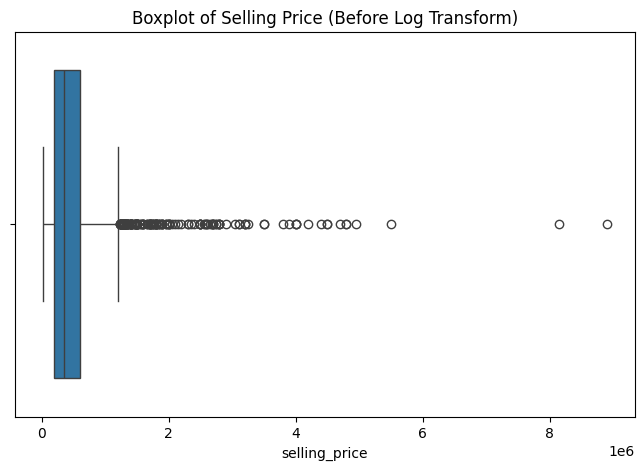

In [21]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['selling_price'])
plt.title("Boxplot of Selling Price (Before Log Transform)")
plt.show()


In [22]:
# Apply log transformation to selling price to deal with the outliers
df1['selling_price'] = np.log1p(df1['selling_price'])

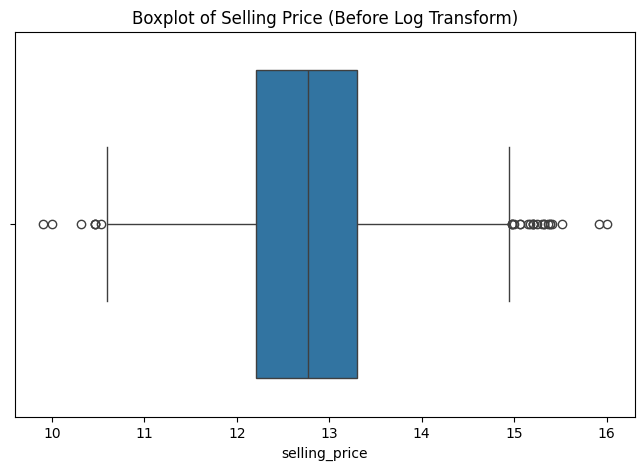

In [23]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['selling_price'])
plt.title("Boxplot of Selling Price (Before Log Transform)")
plt.show()

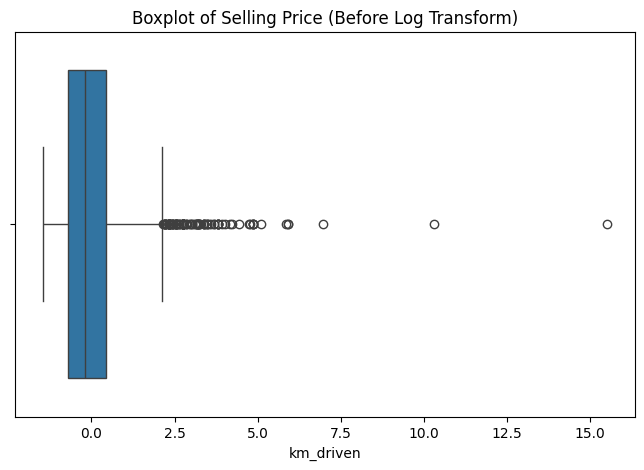

In [24]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['km_driven'])
plt.title("Boxplot of Selling Price (Before Log Transform)")
plt.show()

In [25]:
# Apply log transformation to km_driven to deal with the outliers
df1['km_driven'] = np.log1p(df1['km_driven'])

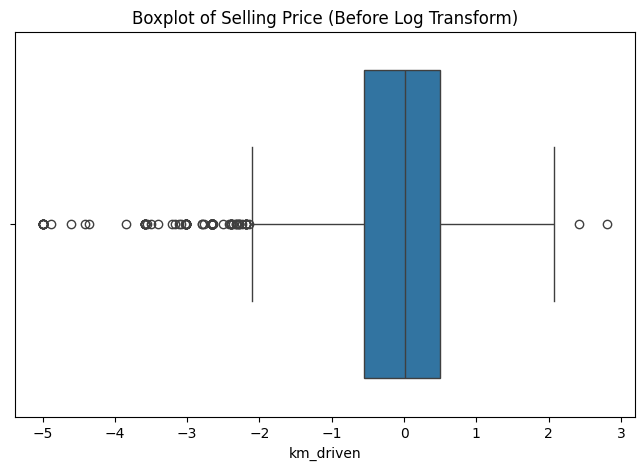

In [26]:
#checking for ouliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['km_driven'])
plt.title("Boxplot of Selling Price (Before Log Transform)")
plt.show()

In [31]:
#turns out log transforming the km_driven backfired.
#so let's fix it
df1['km_driven'].fillna(df1['km_driven'].median(), inplace=True)

In [33]:
#setting up x and y for model training and testing
x = df1.drop('selling_price', axis = 1)
y = df1['selling_price']

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

In [37]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.3416063645866976
Mean Squared Error (MSE): 0.1883340556195383
R² Score: 0.7253465642019441


In [53]:
import pickle

columns = x_train.columns  # Get column names after encoding
pickle.dump(columns, open('model_columns.pkl', 'wb'))

In [54]:
import pickle

pickle.dump(model, open('model_lr.pkl', 'wb'))